In [10]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from patsy import dmatrices

In [11]:
tract_pop_income = pd.read_csv("../geospatial_api-silver-sharks/data/tract_pop_income.csv")

In [12]:
burg_base_pois =  (sm.GLM(endog = tract_pop_income['burglary_count'],
                              exog = sm.add_constant(tract_pop_income[[]]),
                              family = sm.families.Poisson(),
                              offset = tract_pop_income['log_population'])
                       .fit()
 )
burg_base_pois.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      143
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.34
Date:                Sun, 10 Oct 2021   Deviance:                       129.67
Time:                        16:18:21   Pearson chi2:                     141.
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3496      0.049   -149.361      0.000      -7.446      -7.253
==============================================================================
"""

In [13]:
burg_income_pois =  (sm.GLM(endog = tract_pop_income['burglary_count'],
                              exog = sm.add_constant(tract_pop_income['median_income']),
                              family = sm.families.Poisson(),
                              offset = tract_pop_income['log_population'])
                       .fit()
 )
burg_income_pois.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -258.55
Date:                Sun, 10 Oct 2021   Deviance:                       112.10
Time:                        16:18:21   Pearson chi2:                     116.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1149
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.8103      0.138    -49.177      0.000      -7.082      -6.539
median_income -8.807e-06    2.2e-06     -4.001      0.000   -1.31e-05   -4.49e-06
=================================================================================
"""

C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


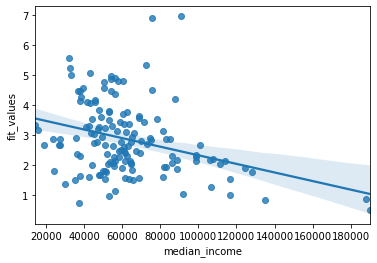

In [14]:
tract_pop_income['fit_values'] = burg_income_pois.fittedvalues

sns.regplot('median_income', 'fit_values',
                data = tract_pop_income);

In [17]:
#fill
np.exp(burg_base_pois.params['const'])
#full_like


0.0006428715969055014

In [18]:
line = np.linspace(0, 3, num=200)

C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

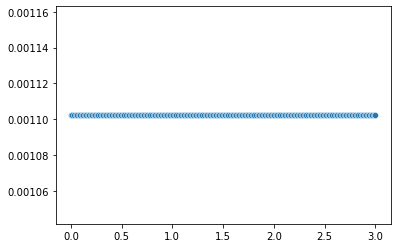

In [19]:
y = np.full_like(line, np.exp(burg_income_pois.params['const']))

sns.scatterplot(line, y)

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
numpy.full_like(a, fill_value, dtype=None, order='K', subok=True, shape=None)
np.exp(poisreg_burglaries.params['const'])

https://seaborn.pydata.org/generated/seaborn.regplot.html


In [20]:
expr = """burglary_count ~ median_income"""

y_train, X_train = dmatrices(expr, tract_pop_income, return_type='dataframe')

poisson_training_results = (sm.GLM(y_train, X_train, 
                                   family=sm.families.Poisson(),
                                   offset = tract_pop_income['log_population'])
                            .fit())                                    
display(poisson_training_results.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         burglary_count   No. Observations:                  144
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -258.55
Date:                Sun, 10 Oct 2021   Deviance:                       112.10
Time:                        16:19:27   Pearson chi2:                     116.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1149
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.8103      0.138    -49.177      0.000      -7.082      -6.539
median_income -8.807e-06    2.2e-06     -4.001      0.000   -1.31e-05   -4.49e-06
=================================================================================
"""

In [21]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[1.84015849 2.76559151 2.13374034 2.63502465 2.36906241 3.5240911
 3.60507079 5.58109991 3.37574549 3.71109499 3.38100809 2.94710603
 3.08181335 2.67853844 3.77627789 2.7350592  2.14358055 4.56515872
 2.87929537 5.08725034 1.81303622 2.08700651 2.48149514 4.16143755
 3.25203102 2.30775559 3.0806472  3.58817505 2.02460922 1.77715711
 0.99503733 1.0328019  1.55438681 4.998683   1.9625119  4.4860736
 3.30783335 1.54219301 2.03729989 2.07845317 2.39945827 2.32570794
 2.88660238 5.25739358 1.66038983 1.37291452 1.809239   1.50231144
 1.59893107 3.17669484 2.47154093 1.58608627 3.63142398 3.42816245
 2.81343928 3.11333766 2.14599071 2.78887344 2.95187659 5.33362624
 4.91788607 4.15537586 2.77821409 4.09838623 1.57848426 4.45936404
 2.92410255 4.96889599 2.17635742 4.06291464 3.44916115 3.77589331
 4.77224564 1.90411227 2.67602663 4.87862946 3.15938776 6.89832225
 1.14770623 4.47842979 2.31591627 3.03581318 2.6828786  0.75146541
 1.69051779 2.66735425 1.805498   3.26439782 3.30240758 2.069244

In [22]:
tract_pop_income['burglary_lambda'] = poisson_training_results.mu

tract_pop_income['aux_OLS_dep'] = (tract_pop_income.apply(
    lambda x: ((x['burglary_count'] - x['burglary_lambda']**2) - x['burglary_lambda']) / 
              x['burglary_lambda'], axis=1))

ols_expr = """aux_OLS_dep ~ burglary_lambda -1"""

aux_olsr_results = smf.ols(ols_expr, tract_pop_income).fit()

print(aux_olsr_results.params)

burglary_lambda   -1.0
dtype: float64


In [23]:
aux_olsr_results.tvalues

burglary_lambda   -60.876449
dtype: float64

In [24]:
nb2_training_results = (sm.GLM(y_train, X_train,
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0]),
                              offset = tract_pop_income['log_population'])
                        .fit())
nb2_training_results.summary()

C:\Users\Conrad\anaconda3\envs\geospatial\lib\site-packages\statsmodels\regression\_tools.py:45: RuntimeWarning: invalid value encountered in sqrt
  w_half = np.sqrt(weights)


ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.